<a href="https://colab.research.google.com/github/navgaur/Mathematical-Physics-II/blob/test1/Series1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **To approximate the elementary functions (e.g. exp(x), sin(x), cos(x), ln(1+x), etc.) by a finite number of terms of Taylor’s series and discuss the truncation error. To plot the function as well the nth partial sum of its series for various values of n on the same graph and visualise the convergence of series.**

### **Series expansion of $e^x$**

$$e^x = \sum_{n=0}^\infty \frac{x^n}{n!} $$

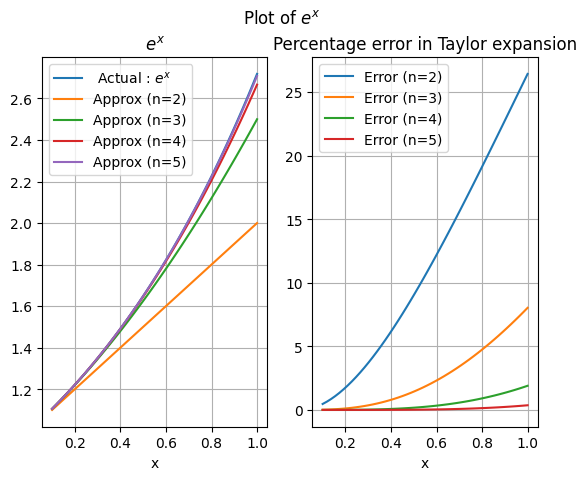

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def taylor_exp(x,n):
  sum = 0
  for i in range(n):
    t = x**i/np.math.factorial(i)
    sum += t
  return sum

# Actual function
x_values = np.linspace(0.1,1,50)
y_values = np.exp(x_values)


fig,axs=plt.subplots(1,2,sharex=True)
fig.suptitle("Plot of $e^x$")

axs[0].set_title("$e^x$")
axs[0].plot(x_values,y_values,label =' Actual : $e^x$')
axs[1].set_title("Percentage error in Taylor expansion")

# The function via Taylor series
for n in [2,3,4,5]:
  y_approx = [taylor_exp(x,n) for x in x_values]
  y_error = np.abs(y_approx-y_values)*100/y_values
  axs[0].plot(x_values,y_approx, label=f'Approx (n={n})')
  axs[1].plot(x_values,y_error, label=f'Error (n={n})')

axs[0].set_xlabel('x')
axs[0].grid()
axs[0].legend()

axs[1].set_xlabel('x')
axs[1].grid()
axs[1].legend()
fig.show()

### **Series expansion of $sin(x)$**

$$sin(x) = \sum_{n=0}^\infty \frac{(-1)^n  x^{2n+1}}{(2n + 1)!} $$

OverflowError: int too large to convert to float

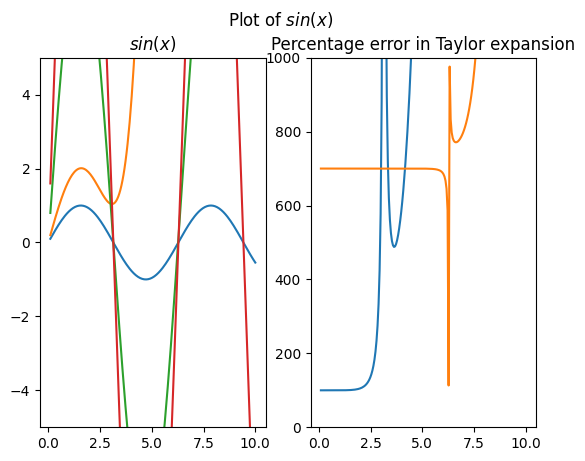

In [50]:
import numpy as np
import matplotlib.pyplot as plt

def taylor_sin(x,n):
  sum = 0
  for i in range(n):
    t = np.sum([(-1)**k * x**(2*k+1)/np.math.factorial(2*k+1) for k in range(n+1)], axis=0)
    sum += t
  return sum

# Actual function
x_values = np.linspace(0.1,10,200)
y_values = np.sin(x_values)


fig,axs=plt.subplots(1,2,sharex=True)
fig.suptitle("Plot of $sin(x)$")

axs[0].set_title("$sin(x)$")
axs[0].set_ylim([-5,5])
axs[0].plot(x_values,y_values,label =' Actual : $sin(x)$')
axs[1].set_title("Percentage error in Taylor expansion")
axs[1].set_ylim([0,1000])
# The function via Taylor series
for n in [2,8,16,100]:
  y_approx = [taylor_sin(x,n) for x in x_values]
  y_error = np.abs((y_approx-y_values)/y_values)*100
  axs[0].plot(x_values,y_approx, label=f'Approx (n={n})')
  axs[1].plot(x_values,y_error, label=f'Error (n={n})')

axs[0].set_xlabel('x')
axs[0].grid()
axs[0].legend()

axs[1].set_xlabel('x')
axs[1].grid()
axs[1].legend()
fig.show()